
<h2 style="text-align: center;">Desafío Equinox AI and Data Lab </h2>





Saludos aspirante:
Estás a punto de comenzar un reto para demostrar que puedes ser parte de Equinox.

Lee con atención las instrucciones para que puedas llevar a cabo tu prueba:

El Desafío Equinox **evaluará 4 aspectos básicos** que se requieren a la hora de elegir a un perfil. 
Por lo tanto la prueba estará dividida en **4 partes**.

- La primera parte evaluará tus conocimientos en **análisis y tratamiento de información**, esto junto a tu habilidad técnica en jupyter Notebooks, Python y demás librerias requeridas en Data analysis.

- La segunda parte esta orientada a conocer tu desempeño en la construcción de modelos de **Machine Learning**, Ten en cuenta seguir el pipeline completo para demostrar que tu modelo tiene un correcto desempeño.

- La tercera parte es un ejercicio orientado a evaluar tus **capacidades en SQL**. Consta de tres preguntas de negocio con la cuales queremos observar tu habilidad en el lenguaje.

- La cuarta parte es un ejercicio de **comunicación**, en donde serás entrevistado por líderes del área y tendrás que contarnos sobre el modo en que abordaste el desafío.

<h4>Reglas para el desafío</h4>

- El desafío podrá ser resuelto en aproximadamente 3 días, **comenzando el viernes 20 de Mayo a las 2:00 pm  y terminará el Lunes 23 de Mayo a las 01:00 pm** .

- Es necesario contar con una cuenta de github para poder descargar el contenido del desafío y subir tus respuestas. Si no tienes una cuenta puedes dirigirte al sitio https://github.com/ y crear una.

- Para la primera y segunda parte se utilizarán Jupyter Notebooks, Python y sus librerías orientadas a análisis de Datos y Machine Learning. Asegúrate de tener instaladas estas herramientas en tu equipo antes del lanzamiento del desafío para que puedas dedicar tus esfuerzos a resolver los problemas.

- La tercera parte tomará la base de datos que esta alojada en https://www.w3schools.com/sql/trysql.asp?filename=trysql_select_all como referencia para las preguntas planteadas. Allí encontrarás una pequeña base de datos y un sandbox donde podrás probar tus queries.

- Todo lo que construyas debe estár en un Jupyter Notebook, La primera y segunda parte deben correr dentro del notebook, mientras que para la tercera parte, solamente debes colocar los queries que resuelvan las preguntas de esta parte. **Asegurate de ser ordenado** para que nuestro proceso de validación pueda ser ágil.

- Asegúrate de dar fork al repositorio https://github.com/EquinoxAI/desafio_equinox con tu nombre y apellido. **Ten en cuenta siempre  dar commit y subir archivos, para poder evaluar tu prueba.**
![example1](img/fork1.png)
![example2](img/fork2.png)

- Debes estar atento las próximas semanas para realizar una entrevista, en la cuál deberás sustentar temas puntuales de tu prueba.


Desde Equinox te deseamos muchos éxitos en este gran desafío y esperamos que des lo mejor de tí.

Te esperamos.




<h4> Primera Parte: Análisis y tratamiento de información </h4>

- Tomando como referencia el archivo **kc_house_data.csv** responde las siguientes preguntas:

    - ¿Cuántos registros y columnas esta compuesto el dataset?
    - ¿Qué años componen el dataset y que cantidad de registros hay para cada año?
    - ¿Cuál es la media de habitaciones de las propiedades que conforman el dataset?
    - ¿Cuál es el precio promedio de alquilar una casa  de 3 pisos o más?
    - ¿Cuántos pisos posée la casa cuyo número de habitaciones es igual a 33?
    - ¿Cuántas propiedades son del año 2015 y tienen un precio mayor a 400000 dólares?
    - ¿Cuál es la distribución del número de pisos en el dataset?. Demuéstralo a través de un gráfico de barras ordenado
    - ¿Con que tipo de distribución relacionaría el precio de las propiedades cuyo valor es menor o igual a 2000000 dentro del dataset         Demuéstralo con un histograma.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

Primero se leen los datos

In [2]:
data = pd.read_csv('kc_house_data.csv', sep=',')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### ¿Cuántos registros y columnas esta compuesto el dataset?

Se tienen 21613 registros y 21 columnas

In [4]:
data.shape

(21613, 21)

### ¿Qué años componen el dataset y que cantidad de registros hay para cada año?

Las casas han sido construidas entre 1934 y 2014

In [5]:
pd.value_counts(data['yr_built'])

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

### ¿Cuál es la media de habitaciones de las propiedades que conforman el dataset?

La media es de 3.37 habitaciones

In [6]:
data['bedrooms'].mean()

3.37084162309721

### ¿Cuál es el precio promedio de alquilar una casa de 3 pisos o más?

El precio promedio es de 587.045 dólares

In [7]:
data[data['floors'] >= 3]['price'].mean()

587045.0273752013

### ¿Cuántos pisos posee la casa cuyo número de habitaciones es igual a 33?

Solo hay una casa con 33 habitaciones, y solo tiene un piso

In [8]:
data[data['bedrooms'] == 33]['floors']

15870    1.0
Name: floors, dtype: float64

### ¿Cuántas propiedades son del año 2015 y tienen un precio mayor a 400000 dólares?

Hay 33 propiedades con esas características

In [9]:
len(data[(data['yr_built'] == 2015) & (data['price'] > 400000)])

33

### ¿Cuál es la distribución del número de pisos en el dataset?. Demuéstralo a través de un gráfico de barras ordenado

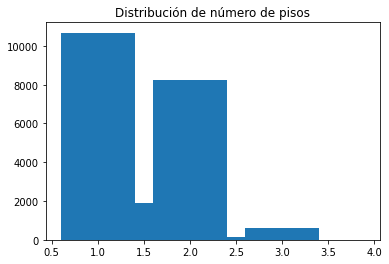

In [10]:
%matplotlib inline
plt.figure()
x = data['floors'].unique()
y = data['floors'].value_counts()
plt.bar(x,y)
plt.title('Distribución de número de pisos')
plt.show()

### ¿Con que tipo de distribución relacionaría el precio de las propiedades cuyo valor es menor o igual a 2000000 dentro del dataset. Demuéstralo con un histograma.

Es una distribución normal sesgada hacia la izquierda

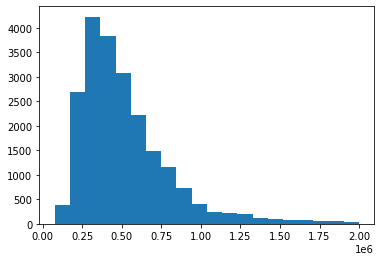

In [11]:
plt.figure()
x = data[data['price'] <= 2000000]['price']
plt.hist(x, bins=20)
plt.show()

<h4> Segunda Parte: Machine Learning </h4>

Tomando el dataset de los ejercicios anteriores entrena un modelo que use inteligencia artificial que prediga el precio de propiedades futuras.

Ten en cuenta: 
- Plantear una correcta división del dataset para entrenar y testear. 
- Usar el modelo correcto.
- Métricas de desemempeño.
- Construir una función para poder inferir resultados fuera del dataset.

Se van a comparar tres modelos para el problema de regresión: Regresión Lineal, Regresión Polinomial y un Perceptrón Multicapa. Primero se hace el preprocesamiento:

### Limpieza de datos

In [12]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No es necesario tratar datos nulos.

In [13]:
data.duplicated().sum()

0

No es necesario tratar datos duplicados.

Para realizar la regresión, se eliminan tres variables poco relevantes para determinar el precio de una propiedad: el ID, la fecha del registro y el Zipcode:

In [14]:
data = data.drop(['id','date','zipcode'], axis=1)

### Modelo 1: Regresión Lineal

#### Construcción de conjuntos de entrenamiento y test

Se separa la variable objetivo, el precio, de las variables independientes:

In [15]:
x = data.drop(['price'], axis=1)
y = data['price']

Se utiliza un 80% de los datos para el entrenamiento y el 20% restante para las pruebas:

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Entrenamiento

In [17]:
reg_lineal = LinearRegression().fit(x_train, y_train)

#### Evaluación

Se calculan cuatro métricas para el modelo de regresión: el Error Cuadrático Medio (MSE), la Raíz del MSE (RMSE, tiene las mismas unidades de la variable objetivo), el Error Absoluto Medio (MAE) y el R<sup>2</sup>:

In [18]:
y_pred = reg_lineal.predict(x_test)

print('------Modelo de regresión lineal----')
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

------Modelo de regresión lineal----
MSE:  36993570334.340546
RMSE:  192337.1267705238
MAE:  122658.98005577651
R2:  0.6889316995334018


### Modelo 2: Regresión Polinomial

#### Transformación de variables

Se verifica si el problema puede tener una relación polinomial entre variables independientes y variable objetivo. Se calculan los términos de un polinomio de grado 2 (se pueden probar otros grados, tratando el problema como una búsqueda de hiperparámetro):

In [19]:
pf = PolynomialFeatures(degree=2)

In [20]:
x_pol = pf.fit_transform(x)
x_pol.shape

(21613, 171)

Se generan 171 términos que describen el polinomio.

#### Construcción de conjuntos de entrenamiento y test

Se realiza una nueva separación de datos con el conjunto modificado:

In [21]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_pol, y, test_size=0.2, random_state=0)

#### Entrenamiento

In [22]:
reg_polinomial = LinearRegression().fit(x_train_p, y_train_p)

#### Evaluación

El modelo de Regresión Polinomial presenta un mejor ajuste de los datos que el modelo de Regresión Lineal, comparando valores del R<sup>2</sup> (aumento de aproximadamente 0.1):

In [23]:
y_pred_p = reg_polinomial.predict(x_test_p)

print('------ Modelo de regresión polinomial----')
print("MSE: ", mean_squared_error(y_test_p, y_pred_p))
print("RMSE: ", mean_squared_error(y_test_p, y_pred_p, squared=False))
print("MAE: ", mean_absolute_error(y_test_p, y_pred_p))
print('R2: ', r2_score(y_test_p, y_pred_p))

------ Modelo de regresión polinomial----
MSE:  25255482136.004757
RMSE:  158919.7348852708
MAE:  101201.0651067114
R2:  0.7876339095007879


### Modelo 3: Perceptrón multicapa

#### Entrenamiento

Se crea un perceptrón multicapa para evaluar una posible relación no lineal entre las variables. Se determinan 5 capas ocultas, aunque se puede modificar la cantidad de capas y la cantidad de neuronas por capa haciendo una búsqueda de hiperparámetros:

In [24]:
perceptron = MLPRegressor(hidden_layer_sizes=[128, 64, 32, 16, 8],max_iter=1000).fit(x_train, y_train)

#### Evaluación

El perceptrón con estas características no presenta un mejor ajuste con respecto al modelo de Regresión Polinomial.

In [25]:
y_pred_mlp = perceptron.predict(x_test)

print('------Perceptrón multicapa----')
print("MSE: ", mean_squared_error(y_test, y_pred_mlp))
print("RMSE: ", mean_squared_error(y_test, y_pred_mlp, squared=False))
print("MAE: ", mean_absolute_error(y_test, y_pred_mlp))
print('R2: ', r2_score(y_test, y_pred_mlp))

------Perceptrón multicapa----
MSE:  44949284606.03343
RMSE:  212012.46332712006
MAE:  141134.3648818487
R2:  0.6220343848074406


### Conclusión

El modelo que mejor se ajusta a los datos es el de Regresión Polinomial. Se podría hacer una búsqueda más exhaustiva de arquitecturas para el Perceptrón o para el grado del polinomio en el modelo de Regresión Polinomial.

<h4> Tercera Parte: Capacidades en SQL </h4>

Resuelve las siguientes preguntas a través de una consulta SQL, La base de datos que usaremos como referencia, se encuentra en:
https://www.w3schools.com/sql/trysql.asp?filename=trysql_select_all
Allí también podrás encontrar un sandbox para realizar las consultas de una manera sencilla.


- Cuales son las categorias de productos que mas han vendido y cuanto han vendido en precio y cantidad.
- Cuantas unidades y dinero de cada producto ha vendido cada empleado 
- Cual es el producto más vendido por cada empleado. 

El orden,buenas prácticas y presentación de las consultas también cuenta. Asegurate de colocarlas en el notebook para que las podamos revisar.

### Cuales son las categorias de productos que mas han vendido y cuanto han vendido en precio y cantidad.

In [ ]:
SELECT cat.CategoryName AS Categoria,
SUM(prod.Price) AS Total,
SUM(ordet.Quantity) AS Cantidad

FROM Categories AS cat
INNER JOIN Products AS prod ON cat.CategoryID=prod.CategoryID
INNER JOIN OrderDetails AS ordet ON ordet.ProductID=prod.ProductID

GROUP BY Categoria
ORDER BY Total DESC

### Cuantas unidades y dinero de cada producto ha vendido cada empleado

In [ ]:
SELECT emp.EmployeeID AS IDEmpleado,
prod.ProductName AS Producto,
SUM(prod.Price) AS Dinero,
SUM(ordet.Quantity) AS Unidades

FROM Employees AS emp
INNER JOIN Orders AS ords ON ords.EmployeeID=emp.EmployeeID
INNER JOIN OrderDetails AS ordet ON ordet.OrderID=ords.OrderID
INNER JOIN Products AS prod ON ordet.ProductID=prod.ProductID

GROUP BY Producto
ORDER BY IDEmpleado ASC

### Cual es el producto más vendido por cada empleado.

In [ ]:
SELECT IDEmpleado,
Producto,
MAX(Unidades) AS TotalVendido
FROM(
  SELECT emp.EmployeeID AS IDEmpleado,
  prod.ProductName AS Producto,
  SUM(ordet.Quantity) AS Unidades
  FROM Employees AS emp
  INNER JOIN Orders AS ords ON ords.EmployeeID=emp.EmployeeID
  INNER JOIN OrderDetails AS ordet ON ordet.OrderID=ords.OrderID
  INNER JOIN Products AS prod ON ordet.ProductID=prod.ProductID
  GROUP BY Producto
)
GROUP BY IDEmpleado